In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Feature Description

`person_age:` The age of the loan applicant. Age can be an indicator of financial stability, experience, and repayment behavior.

`person_income:` The annual income of the loan applicant. Higher income often correlates with a greater ability to repay loans.

`person_home_ownership:` Indicates whether the applicant owns a home, rents, or has a mortgage. Homeownership is often a sign of financial stability, and owning assets may reduce the likelihood of default.

`person_emp_length:` The number of years the applicant has been employed. Longer employment histories typically indicate job stability, which can positively influence loan approval.

`loan_intent:` The purpose of the loan (e.g., education, medical, personal, etc.). Different loan purposes might have varying risk levels for the lender.

`loan_grade:` A credit score grade or classification assigned to the applicant. This is usually a key predictor of the borrower’s creditworthiness.

`loan_amnt:` The amount of the loan that the applicant is requesting. Larger loan amounts could pose a higher risk for lenders, especially if the borrower has limited financial capacity.

`loan_int_rate:` The interest rate applied to the loan. This can reflect the applicant's creditworthiness and the perceived risk of lending. Higher interest rates often accompany higher risk borrowers.

`loan_percent_income:` The ratio of the loan amount to the applicant's income. This measures the burden of the loan relative to the applicant's earnings; a higher percentage may signal a higher risk of default.

`cb_person_default_on_file:` Indicates whether the applicant has any history of defaulting on previous loans (Yes/No). A history of default is a strong predictor of future default risk.

`cb_person_cred_hist_length:` The length of the applicant's credit history in years. A longer credit history gives more data to evaluate the applicant’s financial behavior, typically allowing for better risk assessment.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.shape

(58645, 13)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [6]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df_sample = pd.read_csv("sample_submission.csv")
df_sample.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [30]:
df_org = pd.read_csv("credit_risk_dataset.csv")
df_org.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [31]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [32]:
df_org.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
test = pd.read_csv("test.csv")
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


## Exploratory Data Analysis 

In [13]:
df['loan_status'].value_counts(1) 

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64

In [14]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [15]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [16]:
df['loan_grade'].value_counts()

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

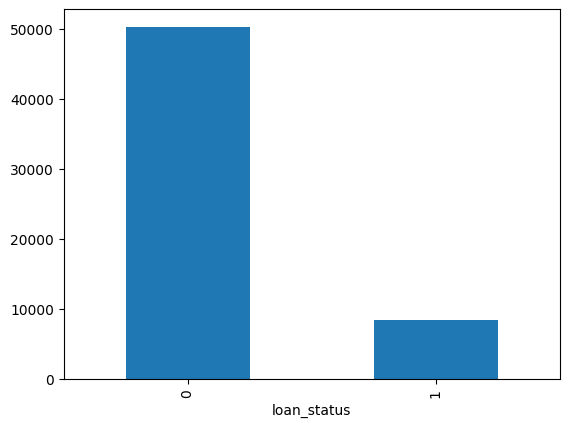

In [17]:
count_classes = pd.value_counts(df['loan_status'])
count_classes.plot(kind = 'bar');

In [18]:
df.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

In [19]:
df = df.drop('id', axis = 1)

In [20]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [21]:
numerical_cols=[]

categorical_cols=[]

for col in df.columns:

    if df[col].dtype=='object':

        categorical_cols.append(col)

    else:

        numerical_cols.append(col)

In [22]:
numerical_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']

In [23]:
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

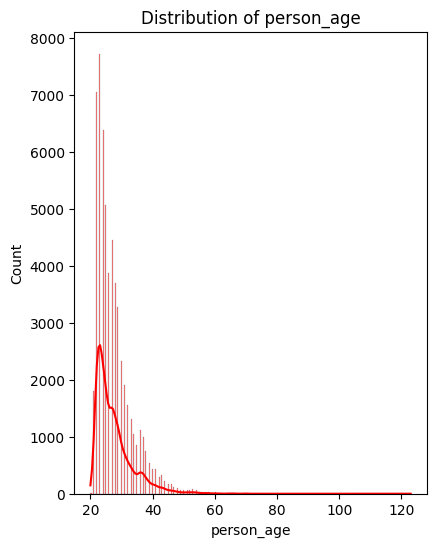

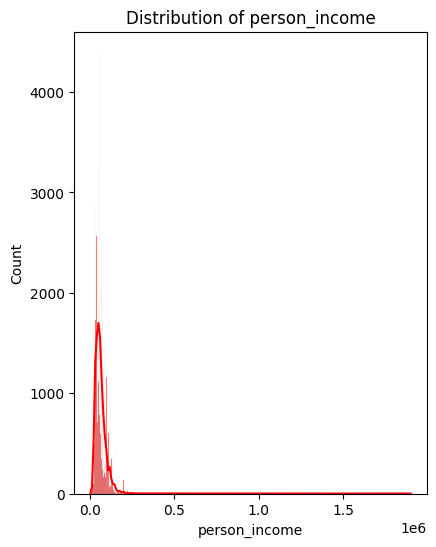

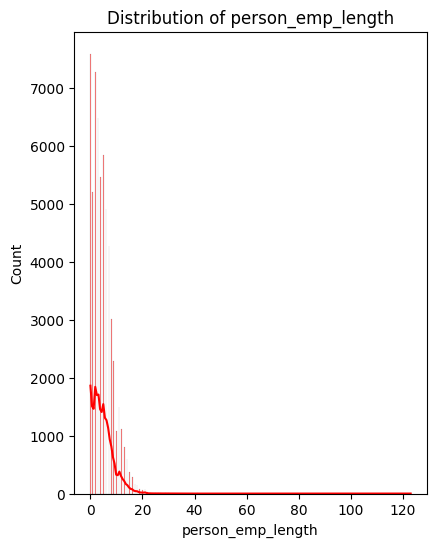

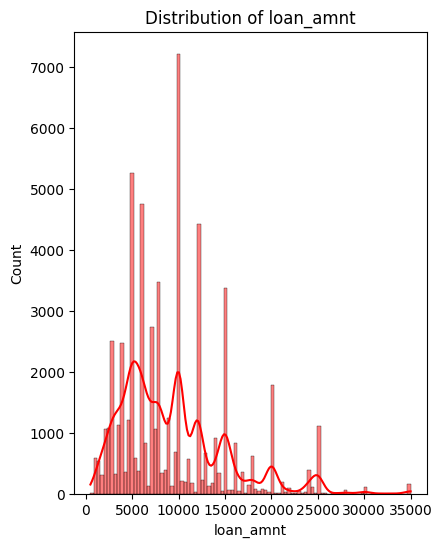

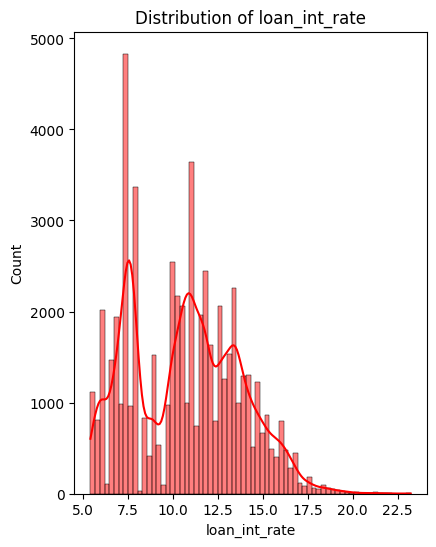

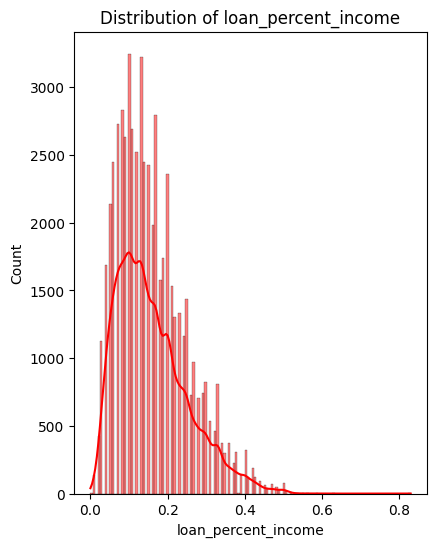

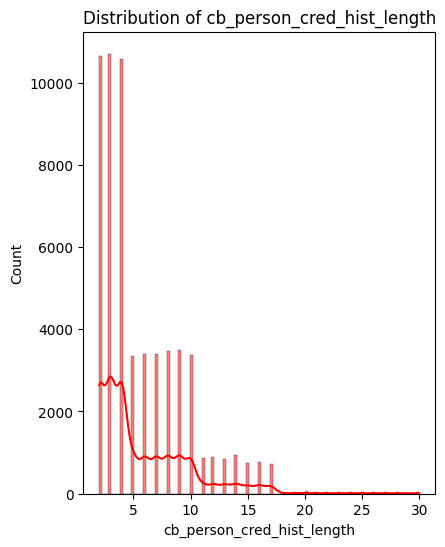

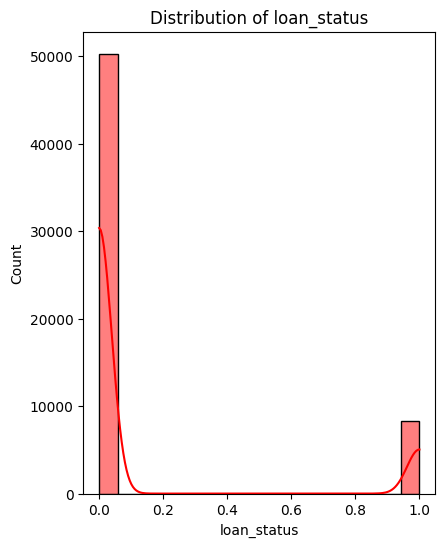

In [24]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde = True, color='r')
    plt.title(f'Distribution of {col}')
    plt.show()


### PDF (Probability Density Function)

<Figure size 1000x600 with 0 Axes>

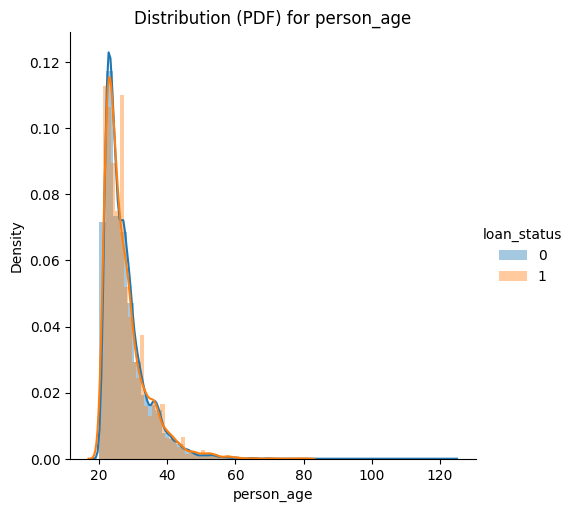

<Figure size 1000x600 with 0 Axes>

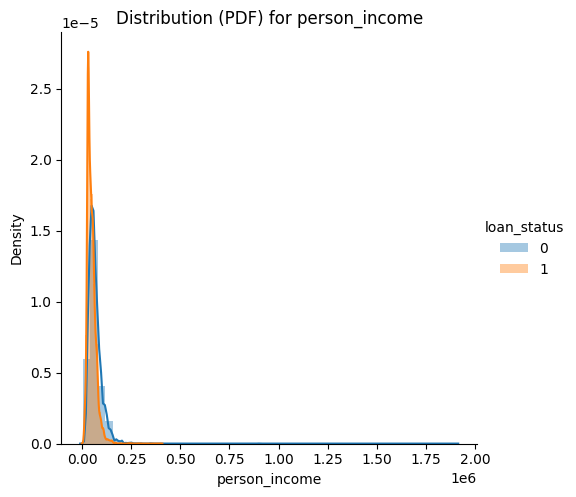

<Figure size 1000x600 with 0 Axes>

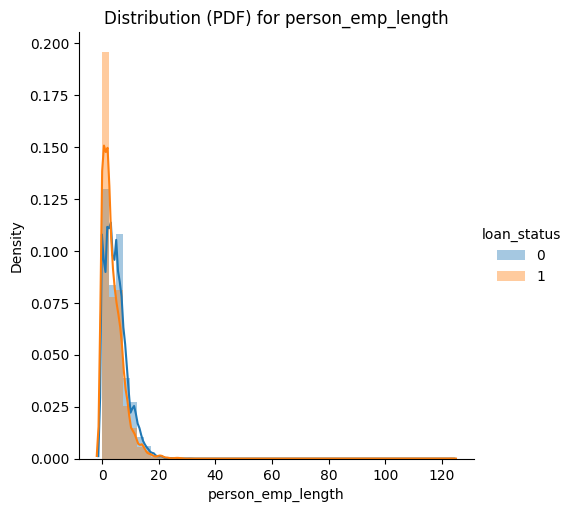

<Figure size 1000x600 with 0 Axes>

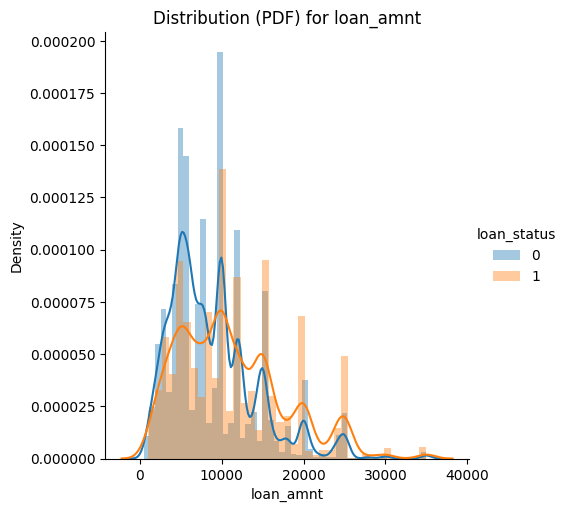

<Figure size 1000x600 with 0 Axes>

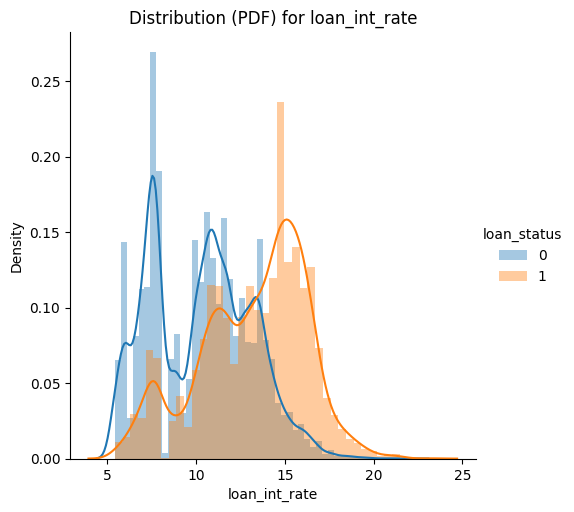

<Figure size 1000x600 with 0 Axes>

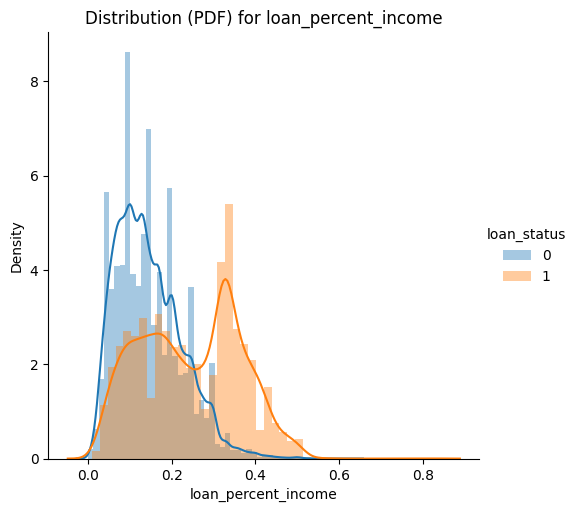

<Figure size 1000x600 with 0 Axes>

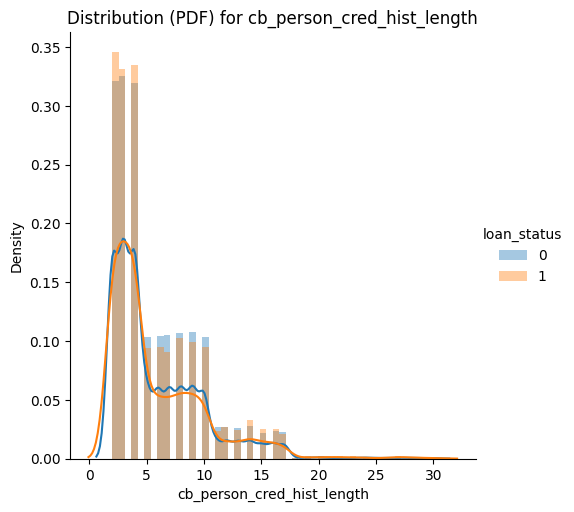

<Figure size 1000x600 with 0 Axes>

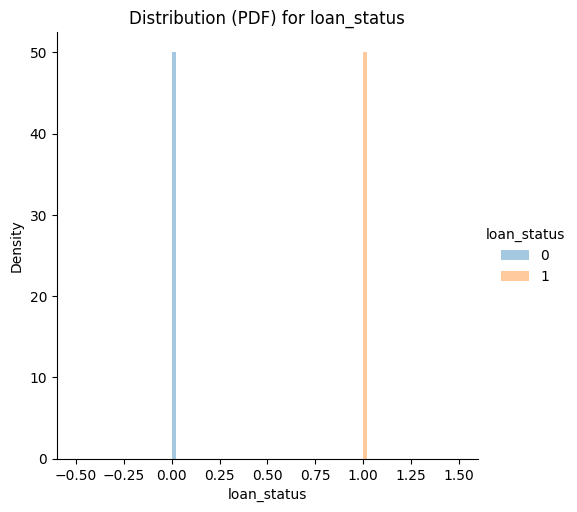

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.FacetGrid(df, hue = 'loan_status', height = 5).map(sns.distplot, col).add_legend();
    plt.title(f'Distribution (PDF) for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

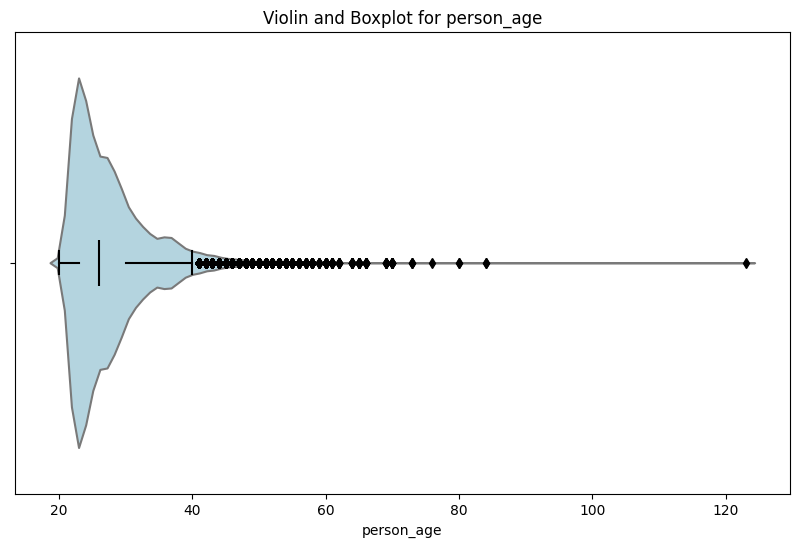

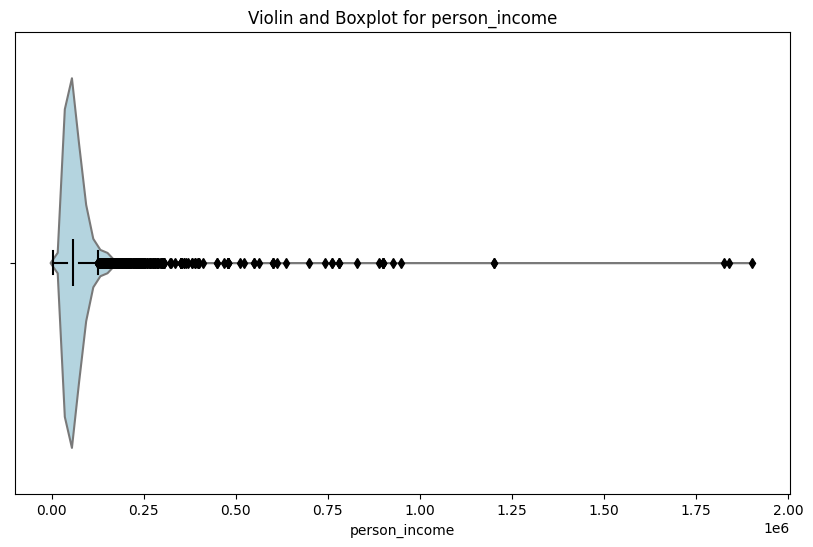

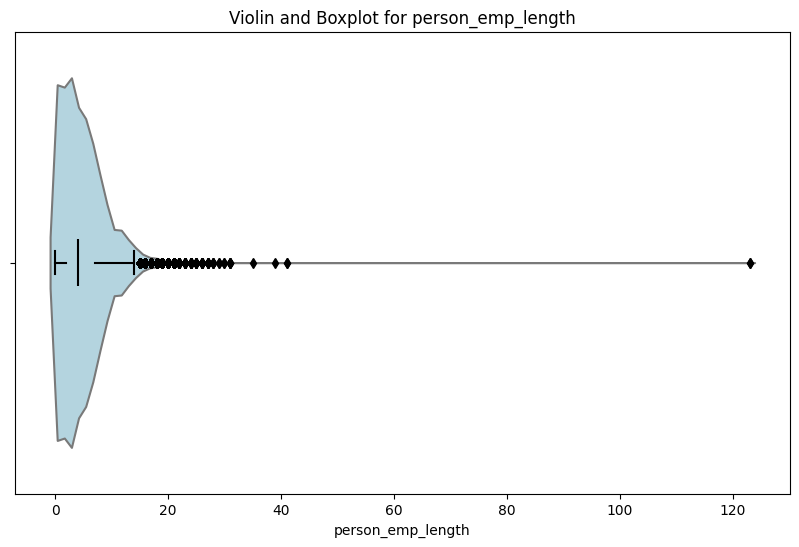

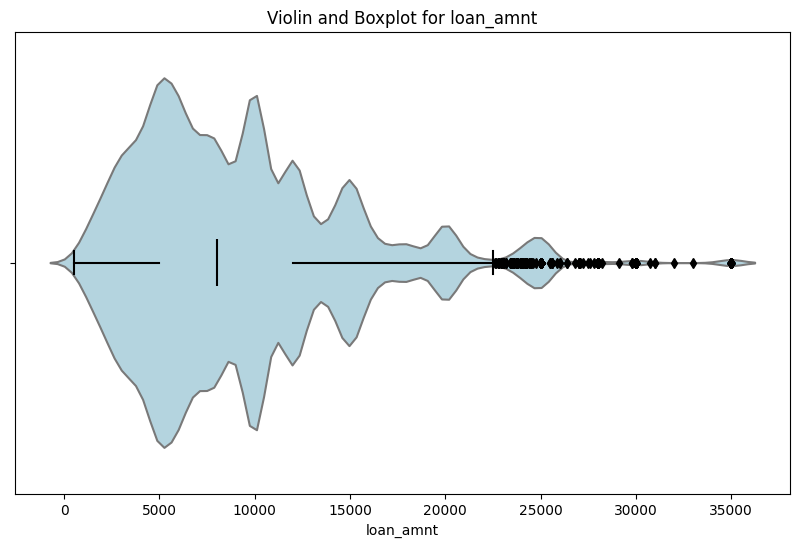

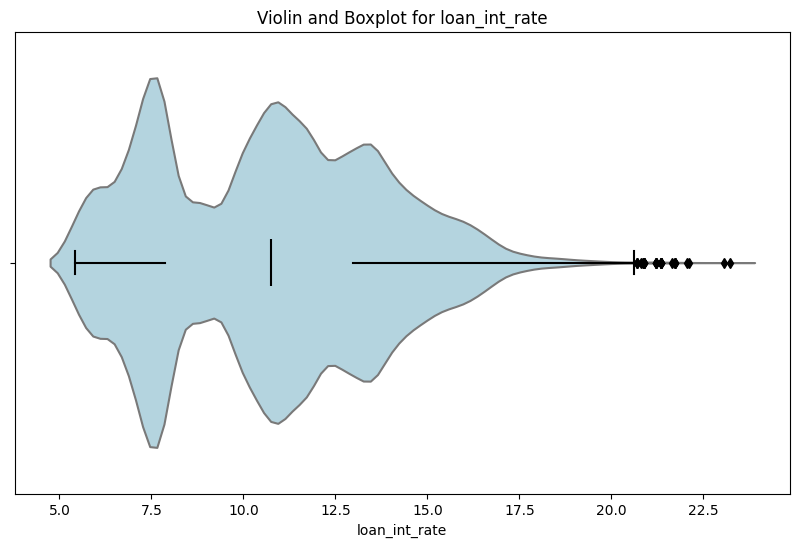

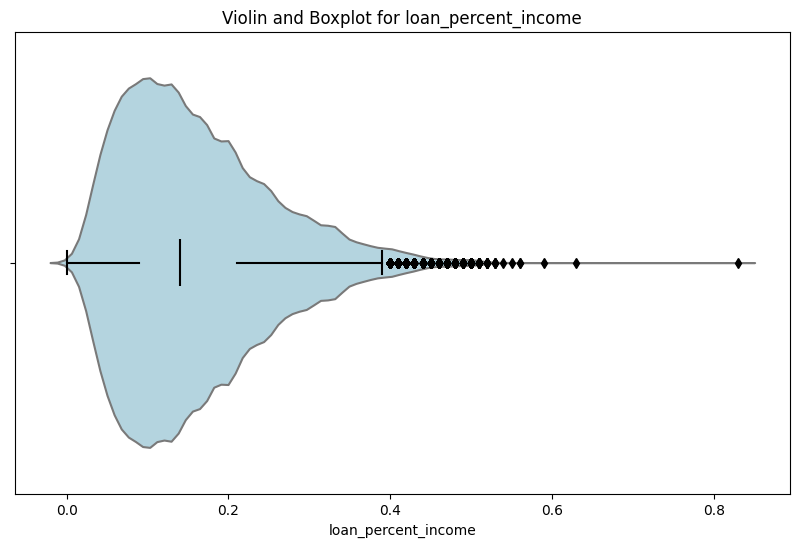

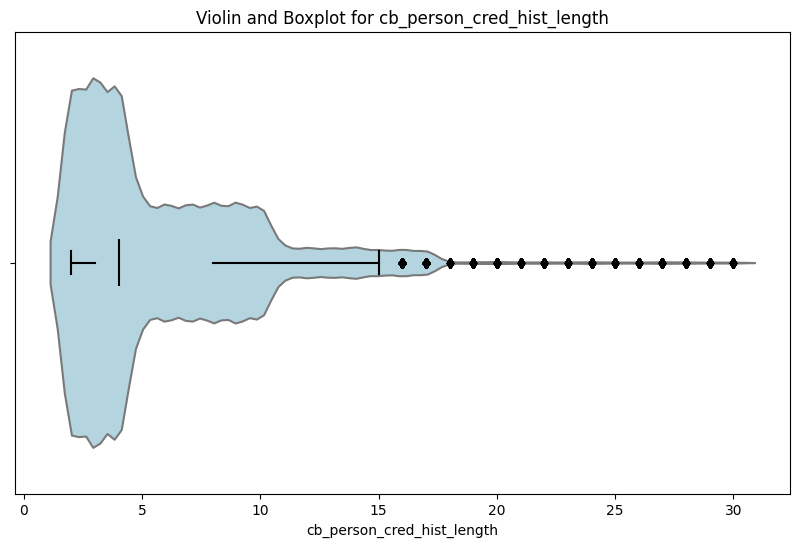

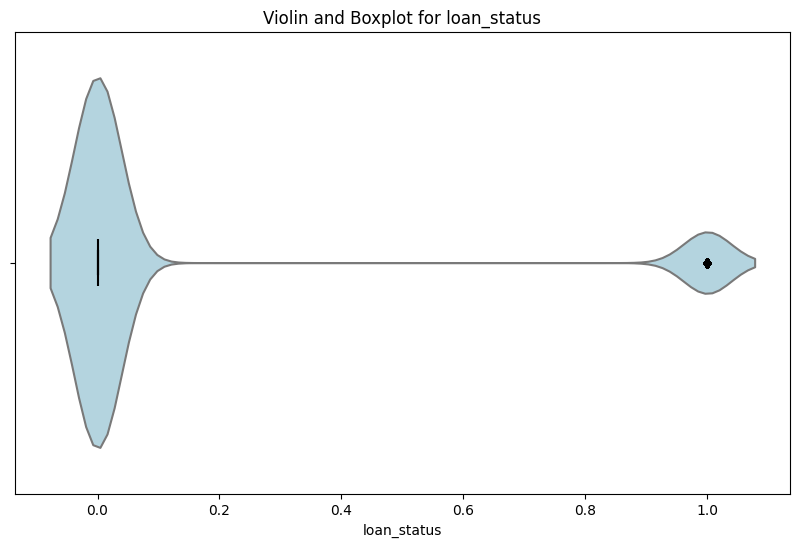

In [26]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    
    # Create a violin plot
    sns.violinplot(x=df[col], inner=None, color="lightblue")
    
    # Overlay a boxplot
    sns.boxplot(x=df[col], width=0.1, color="black")
    
    plt.title(f'Violin and Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

### Analysis for the categorical features 

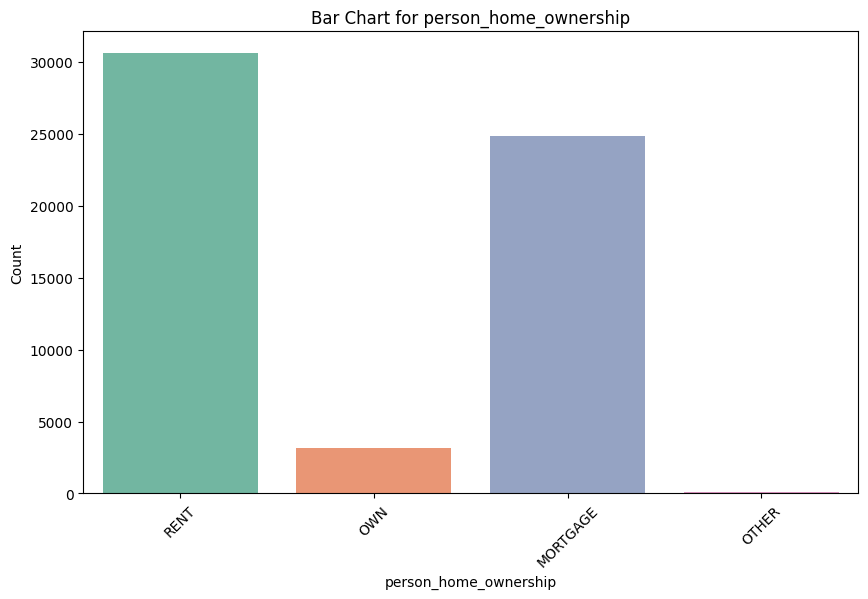

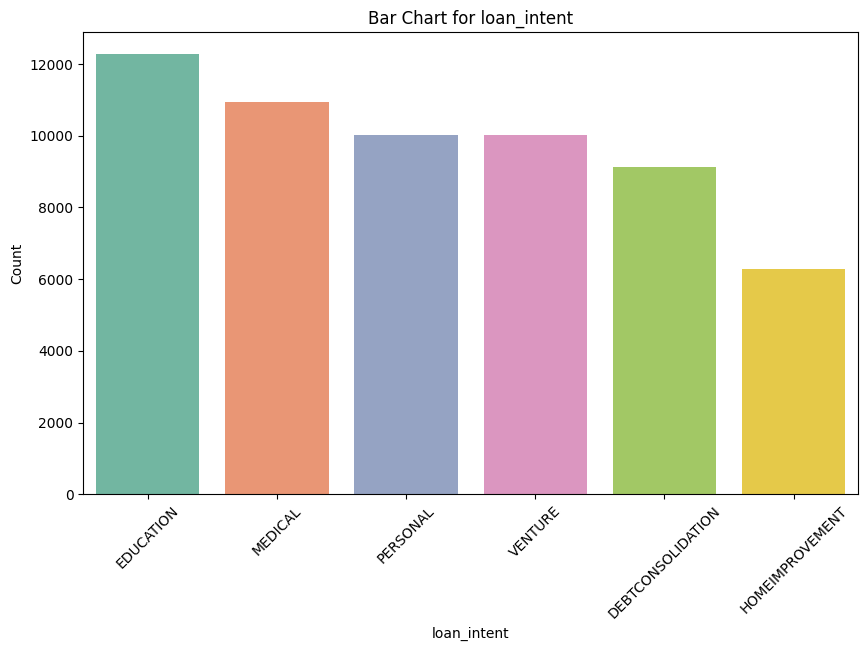

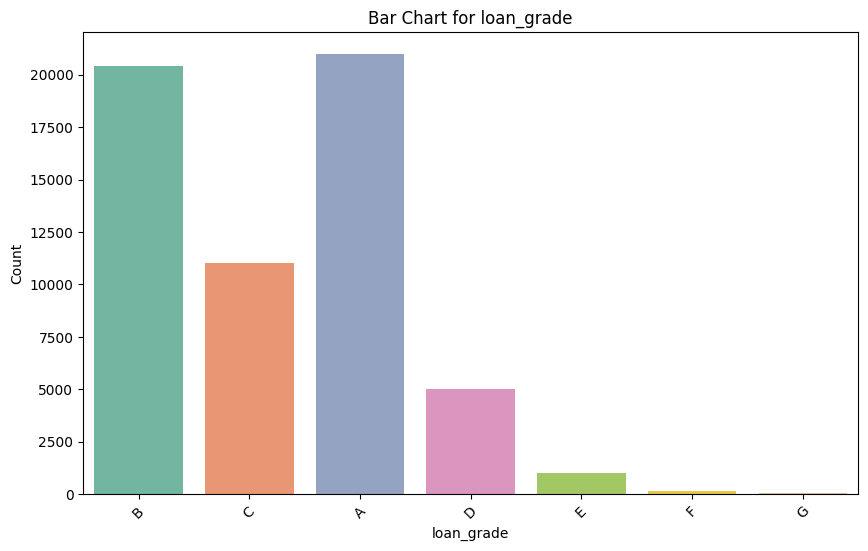

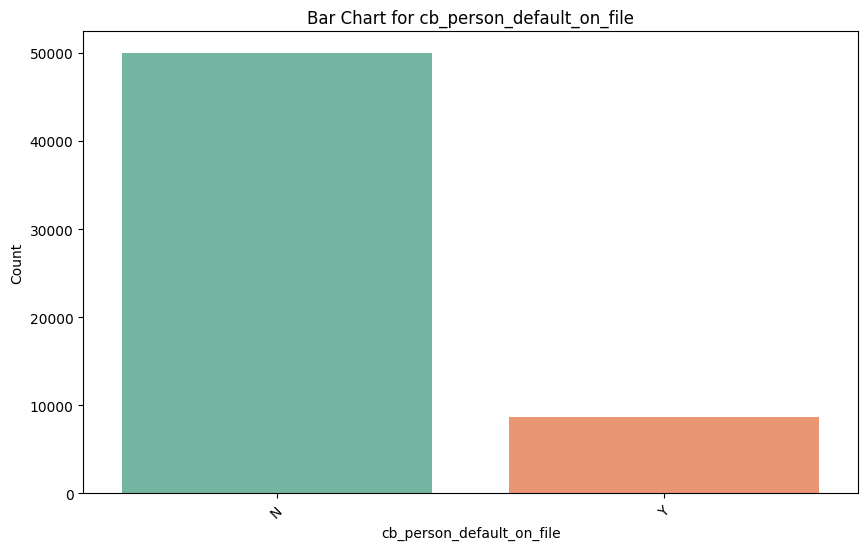

In [27]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    
    # Create a bar chart for each categorical column
    sns.countplot(x=df[col], palette='Set2')
    
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()

## Heatmap for Correlation 

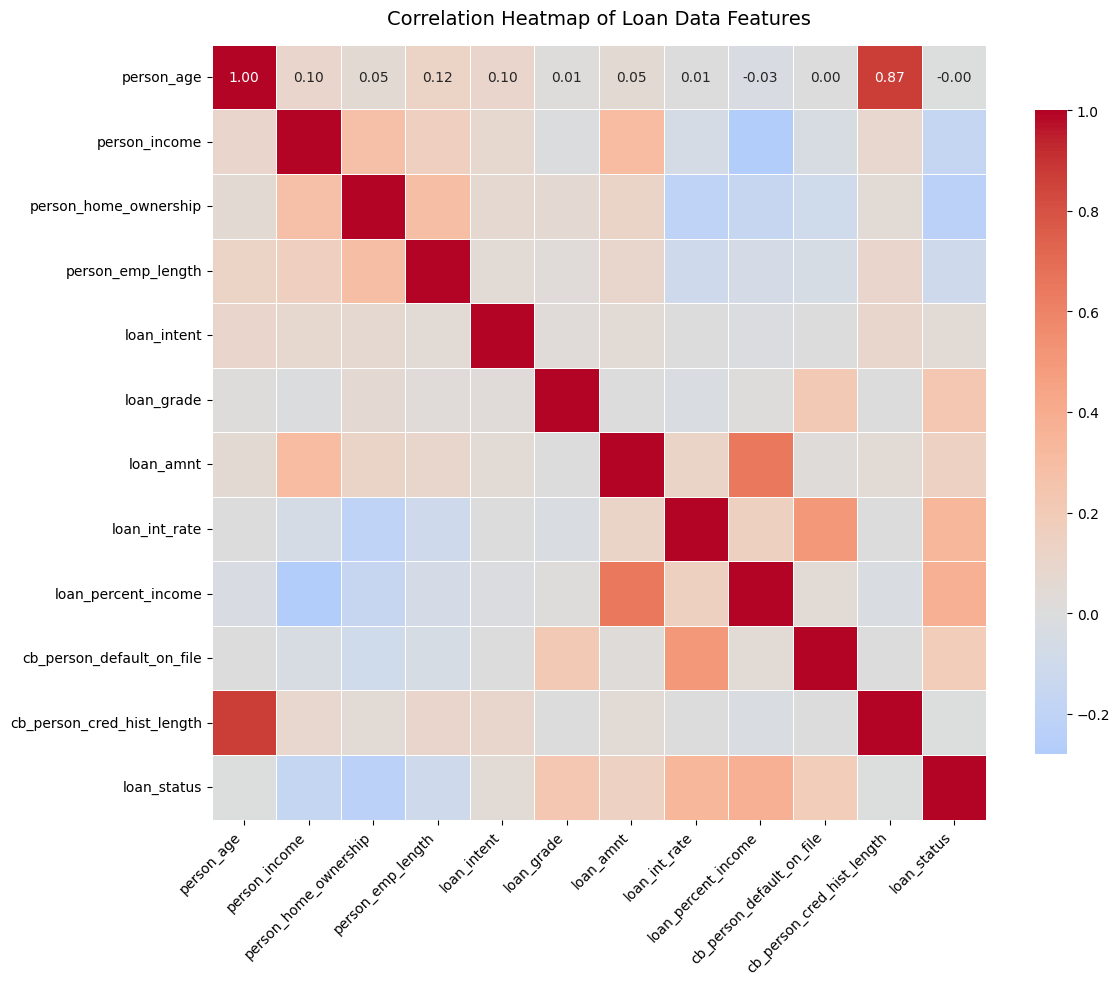

In [29]:
cor = df.copy()
for col in categorical_cols:
    cor[col], _ = cor[col].factorize()

# Calculate the correlation matrix
cor_mat = cor.corr()

# Plot the heatmap with improved visuals
plt.figure(figsize=(12, 10))  # Slightly larger for better readability
sns.heatmap(cor_mat, annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            annot_kws={"size": 10}, linewidths=0.5, square=True, 
            cbar_kws={"shrink": .8})  # Adds a color bar with reduced width

# Axis label formatting for clarity
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap of Loan Data Features", fontsize=14, pad=15)  # Title for context

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

In [34]:
test.drop(columns=['id'], inplace=True)

In [35]:
test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


### Concatenating the original and the training dataset

In [36]:
df_train = df.copy()

In [37]:
df_train = pd.concat([df_train, df_org])
df_train = df_train.reset_index(drop=True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [38]:
df_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [41]:
df_train.shape

(91226, 12)

In [49]:
# Dropping the duplicates
df_train.drop_duplicates(inplace=True)

print(df_train.duplicated().value_counts())
print(df_train.duplicated().sum())

False    91061
Name: count, dtype: int64
0
False    91061
Name: count, dtype: int64
0


In [51]:
print(df['person_emp_length'].mean())
print(df['person_emp_length'].median())

4.701014579248017
4.0


In [52]:
print(df_train['loan_int_rate'].mean())
print(df_train['loan_int_rate'].median())


10.79100084123411
10.95


In [56]:
## Filling the missing Values
df_train['person_emp_length'] = df_train['person_emp_length'].fillna(df_train['person_emp_length'].median())

df_train['loan_int_rate'] = df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean())

In [57]:
df_train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

## Data PreProcessing 

In [58]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [61]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,91061.0,27.620683,6.150047,20.00,23.00,26.000000,30.00,144.00
person_income,91061.0,64774.320917,47922.855155,4000.00,40000.00,57000.000000,78000.00,6000000.00
person_emp_length,91061.0,4.451467,3.195426,0.00,3.00,4.000000,5.00,123.00
loan_amnt,91061.0,9351.508352,5848.017127,500.00,5000.00,8000.000000,12000.00,35000.00
loan_int_rate,91061.0,10.677874,2.435361,5.42,9.91,10.677874,11.58,23.22
loan_percent_income,91061.0,0.163158,0.097486,0.00,0.09,0.140000,0.22,0.83
cb_person_cred_hist_length,91061.0,5.812752,4.039820,2.00,3.00,4.000000,8.00,30.00
loan_status,91061.0,0.169546,0.375235,0.00,0.00,0.000000,0.00,1.00


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91061 entries, 0 to 91225
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91061 non-null  int64  
 1   person_income               91061 non-null  int64  
 2   person_home_ownership       91061 non-null  object 
 3   person_emp_length           91061 non-null  float64
 4   loan_intent                 91061 non-null  object 
 5   loan_grade                  91061 non-null  object 
 6   loan_amnt                   91061 non-null  int64  
 7   loan_int_rate               91061 non-null  float64
 8   loan_percent_income         91061 non-null  float64
 9   cb_person_default_on_file   91061 non-null  object 
 10  cb_person_cred_hist_length  91061 non-null  int64  
 11  loan_status                 91061 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [65]:
print(numerical_cols)
print("\n")
print(categorical_cols)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']


['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


### Handling the categorical features 

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded_df = df_train.copy()

for col in categorical_cols:
    encoded_df[col] = le.fit_transform(encoded_df[col])

encoded_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


In [67]:
encoded_df['person_home_ownership'].value_counts()

person_home_ownership
3    46972
0    38193
2     5701
1      195
Name: count, dtype: int64

In [68]:
encoded_df['loan_grade'].value_counts()

loan_grade
0    31687
1    30787
2    17474
3     8654
4     1972
5      390
6       97
Name: count, dtype: int64

In [69]:
encoded_df['person_emp_length'] = encoded_df['person_emp_length'].astype(int)
encoded_df['loan_int_rate'] = (encoded_df['loan_int_rate'] * 100).astype(int)
encoded_df['loan_percent_income'] = (encoded_df['loan_percent_income']*100).astype(int)


In [70]:
encoded_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,3,0,1,1,6000,1149,17,0,14,0
1,22,56000,2,6,3,2,4000,1335,7,0,2,0
2,29,28800,2,8,4,0,6000,890,21,0,10,0
3,30,70000,3,14,5,1,12000,1111,17,0,5,0
4,22,60000,3,2,3,0,6000,692,10,0,3,0


In [73]:
print((encoded_df['loan_amnt']/encoded_df['person_income'])*100)

0        17.142857
1         7.142857
2        20.833333
3        17.142857
4        10.000000
           ...    
91221    10.943396
91222    14.687500
91223    46.052632
91224    10.000000
91225    15.416667
Length: 91061, dtype: float64


In [74]:
test_df = test.copy()

for col in categorical_cols:
    test_df[col] = le.fit_transform(test_df[col])

test_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
1,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
2,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
3,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
4,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4


In [76]:
test_df['person_emp_length'] = test_df['person_emp_length'].astype(int)
test_df['loan_int_rate'] = (test_df['loan_int_rate']*100).astype(int)
test_df['loan_percent_income'] = (test_df['loan_percent_income']*100).astype(int)

In [77]:
test_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,3,3,2,5,25000,1576,36,0,2
1,26,96000,0,6,4,2,10000,1268,10,1,4
2,26,30000,3,5,5,4,4000,1719,13,1,2
3,33,50000,3,4,0,0,7000,890,14,0,7
4,26,102000,0,8,2,3,15000,1632,15,1,4


In [78]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91061 entries, 0 to 91225
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   person_age                  91061 non-null  int64
 1   person_income               91061 non-null  int64
 2   person_home_ownership       91061 non-null  int32
 3   person_emp_length           91061 non-null  int32
 4   loan_intent                 91061 non-null  int32
 5   loan_grade                  91061 non-null  int32
 6   loan_amnt                   91061 non-null  int64
 7   loan_int_rate               91061 non-null  int32
 8   loan_percent_income         91061 non-null  int32
 9   cb_person_default_on_file   91061 non-null  int32
 10  cb_person_cred_hist_length  91061 non-null  int64
 11  loan_status                 91061 non-null  int64
dtypes: int32(7), int64(5)
memory usage: 6.6 MB


In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   person_age                  39098 non-null  int64
 1   person_income               39098 non-null  int64
 2   person_home_ownership       39098 non-null  int32
 3   person_emp_length           39098 non-null  int32
 4   loan_intent                 39098 non-null  int32
 5   loan_grade                  39098 non-null  int32
 6   loan_amnt                   39098 non-null  int64
 7   loan_int_rate               39098 non-null  int32
 8   loan_percent_income         39098 non-null  int32
 9   cb_person_default_on_file   39098 non-null  int32
 10  cb_person_cred_hist_length  39098 non-null  int64
dtypes: int32(7), int64(4)
memory usage: 2.2 MB


## Model Training 

In [80]:
from xgboost import XGBClassifier

X = encoded_df.drop('loan_status', axis = 1)
Y = encoded_df['loan_status']

In [87]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [93]:
aucs = []
accuracies = []
roc_curves = []
test_preds = []  

In [97]:
encoded_df.shape

(91061, 12)

In [94]:
feature_columns = [c for c in encoded_df.columns if c not in ['id', 'loan_status']]

In [98]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import numpy as np

# Initialize lists to store metrics and predictions for each fold
aucs = []
accuracies = []
roc_curves = []
test_preds = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(encoded_df, encoded_df['loan_status'])):
    print(f'### Fold {fold + 1} Training ###')

    # Access data by positional indices using .iloc
    X_train = encoded_df.iloc[train_idx][feature_columns]
    y_train = encoded_df.iloc[train_idx]['loan_status']
    X_valid = encoded_df.iloc[valid_idx][feature_columns]
    y_valid = encoded_df.iloc[valid_idx]['loan_status']
    X_test = test_df[feature_columns]

    # Initialize CatBoost model with given hyperparameters
    model = CatBoostClassifier(
        learning_rate=0.09813398668330696,
        iterations=3651,
        depth=5,
        random_strength=6.830732436901465,
        l2_leaf_reg=0.0028440479590379113,
        loss_function='Logloss',
        eval_metric='AUC',
        task_type='GPU',
        random_seed=42,
        verbose=False
    )

    # Prepare Pool objects for train, validation, and test datasets
    X_train_pool = Pool(X_train, y_train, cat_features=feature_columns)
    X_valid_pool = Pool(X_valid, y_valid, cat_features=feature_columns)
    X_test_pool = Pool(X_test, cat_features=feature_columns)

    # Train the model and evaluate on the validation set
    model.fit(X_train_pool, eval_set=X_valid_pool)

    # Predict probabilities for validation and test sets
    pred_valid = model.predict_proba(X_valid_pool)[:, 1]  
    pred_test = model.predict_proba(X_test_pool)[:, 1]

    # Calculate metrics
    auc = roc_auc_score(y_valid, pred_valid)
    accuracy = accuracy_score(y_valid, np.round(pred_valid))

    # Store results for this fold
    aucs.append(auc)
    accuracies.append(accuracy)
    fpr, tpr, _ = roc_curve(y_valid, pred_valid)
    roc_curves.append((fpr, tpr))
    test_preds.append(pred_test)

    print(f'Fold {fold + 1} AUC: {auc:.5f}, Accuracy: {accuracy:.5f}\n')


### Fold 1 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 1 AUC: 0.96852, Accuracy: 0.95147

### Fold 2 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 2 AUC: 0.96792, Accuracy: 0.94762

### Fold 3 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 3 AUC: 0.96316, Accuracy: 0.94476

### Fold 4 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 4 AUC: 0.96816, Accuracy: 0.94992

### Fold 5 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 5 AUC: 0.96256, Accuracy: 0.94707

### Fold 6 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 6 AUC: 0.96431, Accuracy: 0.94685

### Fold 7 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 7 AUC: 0.96307, Accuracy: 0.94333

### Fold 8 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 8 AUC: 0.96772, Accuracy: 0.94926

### Fold 9 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 9 AUC: 0.96687, Accuracy: 0.94575

### Fold 10 Training ###


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 10 AUC: 0.96273, Accuracy: 0.94652



In [110]:
test = pd.read_csv("test.csv")

In [111]:
final_pred_test = np.mean(test_preds, axis=0)

submission = test[['id']].copy()
submission['loan_status'] = final_pred_test

In [112]:
print(test_df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


In [113]:
print(submission)

          id  loan_status
0      58645     0.999999
1      58646     0.014961
2      58647     0.504436
3      58648     0.004354
4      58649     0.020648
...      ...          ...
39093  97738     0.072481
39094  97739     0.002845
39095  97740     0.003151
39096  97741     0.199998
39097  97742     0.930426

[39098 rows x 2 columns]


In [114]:
submission.to_csv('Loan_pred_notebook.csv', index=False)
print("File Saved!!")

File Saved!!


In [115]:
len(submission)

39098